In [1]:
import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [3]:
base_url = 'https://hanbit.co.kr'
main_url = '/academy/books/new_book_list.html'
url = f'{base_url}{main_url}?page=1'
result = requests.get(url)
soup = BeautifulSoup(result.text)

In [7]:
from tqdm import tqdm
lines = []
for page in tqdm(range(1,24)):
    url = f'{base_url}{main_url}?page={page}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text)
    lis = soup.select('li.sub_book_list')
    
    for li in lis:
        href = li.find('a')['href']
        sub_req = requests.get(base_url + href)
        sub_soup = BeautifulSoup(sub_req.text, 'html.parser')

        title = sub_soup.select_one('.store_product_info_box > h3').get_text().strip()
        info_lis = sub_soup.select('.info_list > li')
        tags = sub_soup.select('.tag_area > a')
        for a in tags:
            lines.append(a.get_text().strip())
        

100%|██████████| 23/23 [04:59<00:00, 13.01s/it]


In [8]:
len(lines)

2662

In [9]:
lines[:10]

['매트랩',
 'MATLAB',
 '매트랩 프로그래밍',
 '의학통계',
 '논문',
 '통계',
 '분석',
 '데이터분석',
 'jamovi',
 '메타분석']

In [11]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

태그 리스트를 frequency dicitonary 로 만들기

In [12]:
tag_set = set(lines)
len(tag_set)

1425

In [15]:
tag_dict = {item: lines.count(item) for item in tag_set}

In [17]:
count = 0
for key, val in tag_dict.items():
    print(key,':' ,val)
    count+=1
    if count >5:
        break

 : 1
adobe : 1
bible : 1
유무선네트워크 : 1
designschool : 3
ESP8266 : 1


- word cloud

In [18]:
wc = WordCloud(
    background_color='white',
    random_state=2023,

)
wc = wc.generate_from_frequencies(tag_dict)

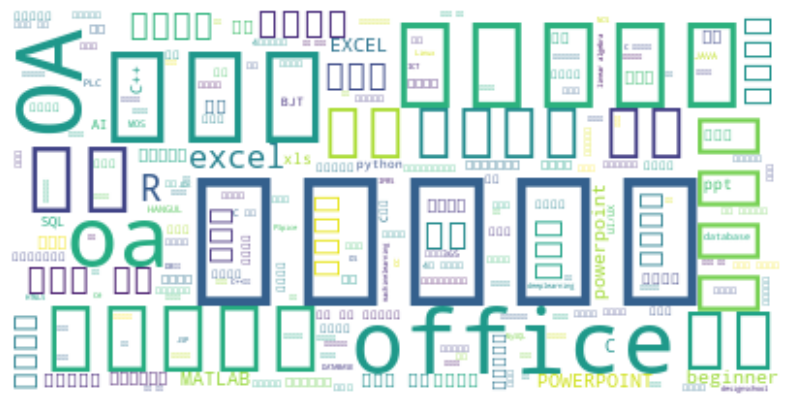

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

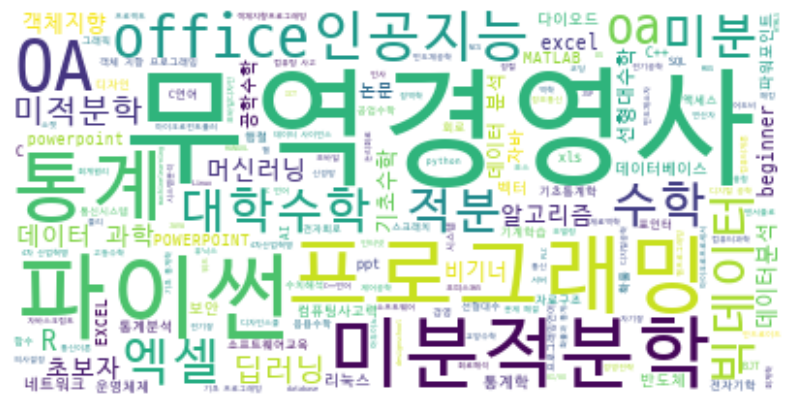

In [23]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc'
).generate_from_frequencies(tag_dict)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [24]:
tag_text = ' '.join(lines)
tag_text[:100]

'매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 '